# Intro

 - **Mục tiêu**: Mong muốn sinh 1 mẫu với phân phối f nào đó.  
 - **Phương pháp sử dụng**: Sinh Markov Chain $\rightarrow$ có phân phối dừng là hàm $f$ mong muốn.  

## Vấn đề tích phân trong thống kê Bayesian

Giả sử có 1 mẫu ${x_1, x_2, ..., x_n}$ ta  
Định nghĩa ra 1 hàm likelihood $f(x_1, x_2, ..., x_n | \theta)$

Sử dụng công thức Bayes ta có thể tính được $f(\theta | x)$  
Từ đó tính được kỳ vọng $E[g(\theta | x)]$ hay chính là $E[g(Y)]$

## Tích phân Markov Chain Monte Carlo  

Tính chất của chuỗi Markov 

# Phương pháp con 1. Thuật toán Metropolis-Hastings 

 - **Mục tiêu**: Sinh ra 1 chuỗi Markov Chain  
 - **Cách thức**: Việc sinh mẫu. Giả thiết có 1 điểm data nào đó. Dựa trên phân phối đề xuất $g(. | X_t)$ nào đó $\rightarrow$ Chấp nhận OR Bác bỏ điểm được sinh ra tiếp theo dựa trên phân phối $g$. Như vậy có thể gọi là sig Markov (cái tạo sau liên quan tới cái tạo trước đó)

Điều đó đồng nghĩa $g(.|X_t)$ sẽ thay đổi liên tục tùy thuộc vào $X_t$ đang xét hiện tại.

Vấn đề là chọn phân phối đề xuất $g$ như thế nào đi nữa (phải đảm bảo điều kiện **giống họ các phân phối - class distribution**) thì sẽ đảm bảo hội tụ.  
Tuy nhiên nếu phân phối $g$ được chọn là đủ tốt thì sẽ giúp tốc độ hội tụ (không bác bỏ liên tục) sẽ nhanh hơn. Từ đó giúp việc sinh ra mẫu $X$ nhanh, tránh mất thời gian hơn.

## Thuật toán

Đầu tiên ta tạo $X_0$ từ phân phối $g$ đã chọn. Bây giờ liên tục lặp cho đến khi tạo đủ số điểm data cho mẫu mong muốn: 

 - B1. Tạo $Y$ theo phân phối $g(.|X_t)$  
 - B2. Tạo $U$ từ phân phối Chuẩn (0, 1)  
 - B3. Nếu điều kiện $U \leq \frac{f(Y)g(X_t|Y)}{f(X_t)g(Y|X_t)}$ được thỏa mãn thì ta chấp nhận điểm $Y$ được tạo ra ($X_{t+1} = Y$) còn không thì $X_{t+1} = X_{t}$.

In [1]:
f <- function(x, sigma) {
    if (any(x < 0)) {
        return(0)
    }
    stopifnot(sigma > 0)
    return((x / sigma^2) * exp(-x^2 / (2 * sigma^2)))
}

m <- 10000
sigma <- 4
x <- numeric(m)
x[1] <- rchisq(1, df = 1)
k <- 0
u <- runif(m)
for (i in 2:m) {
    xt <- x[i - 1]
    y <- rchisq(1, df = xt)
    num <- f(y, sigma) * dchisq(xt, df = y) # g là hàm dchisq
    den <- f(xt, sigma) * dchisq(y, df = xt)
    if (u[i] <= num / den) {
        x[i] <- y
    } else {
        x[i] <- xt
        k <- k + 1
        # y is rejected
    }
}
print(k)

[1] 4073


Thuật toán Metropolis-Hastings là một phương pháp quan trọng trong Markov Chain Monte Carlo (MCMC) được sử dụng để lấy mẫu từ một phân phối có phân phối dư luận phức tạp. Trong thuật toán này, chúng ta sử dụng một quá trình Markov để di chuyển qua các trạng thái khác nhau của không gian mẫu, và chúng ta chấp nhận hoặc từ chối mỗi bước của quá trình Markov này dựa trên một tỷ lệ được gọi là tỷ lệ chấp nhận.

Trong đoạn mã bạn đã cung cấp, chúng ta sử dụng thuật toán Metropolis-Hastings để lấy mẫu từ một phân phối chisquare bằng cách sử dụng một hàm mật độ xác suất không chuẩn. Dưới đây là ý nghĩa của mỗi phần của đoạn mã:

1. Hàm f(x, sigma): Đây là hàm mật độ xác suất không chuẩn được sử dụng trong phương pháp Metropolis-Hastings để xác định tỷ lệ chấp nhận. Trong trường hợp này, hàm này được định nghĩa để trả về giá trị 0 nếu bất kỳ giá trị x nào nhỏ hơn 0, và trả về một giá trị phức tạp dựa trên x nếu x lớn hơn hoặc bằng 0.

2. Mẫu ban đầu và số lần từ chối (k): Ban đầu, chúng ta chọn một giá trị ngẫu nhiên cho x từ phân phối chisquare với một độ tự do. Trong vòng lặp, chúng ta tính toán một số lượng mẫu m mới từ phân phối chisquare với một độ tự do dựa trên giá trị x hiện tại, sau đó xác định liệu chúng ta nên chấp nhận mẫu mới này hay không dựa trên tỷ lệ chấp nhận.

3. Vòng lặp Metropolis-Hastings: Trong mỗi vòng lặp, chúng ta lấy mẫu một giá trị y từ phân phối chisquare với một độ tự do, sau đó tính tỷ lệ chấp nhận num/den dựa trên hàm f và hàm mật độ xác suất chisquare. Nếu giá trị của u (một biến ngẫu nhiên từ phân phối đồng nhất) nhỏ hơn tỷ lệ chấp nhận, chúng ta chấp nhận mẫu mới y; nếu không, chúng ta tiếp tục với giá trị hiện tại của x và tăng biến k để đếm số lần từ chối.

4. Kết quả: Cuối cùng, chúng ta in ra số lần từ chối k, mà có thể là một chỉ số về sự hiệu quả của phương pháp Metropolis-Hastings. Đối với một phân phối phức tạp, số lần từ chối có thể cao, nhưng chúng ta vẫn có thể thu thập một chuỗi mẫu có phân phối gần với phân phối mục tiêu.

# Phương pháp con 2. The Gibbs Sampler

Dùng khi hàm mục tiêu là 1 phân phối nhiều chiều.  
Mỗi chiều là 1 phân phối và có thể sinh data cho từng chiều.  

## Thuật toán  
B1. Tạo $X(0)$ tại thời điểm $t = 0$ ? bằng cách nào (tạo theo cách nào cũng được miễn là thuộc vào không gian mẫu của nó)  
B2. Vòng lặp $t = 1, 2, ..., n$  
- Đặt $x_1 = X_{1}(t - 1)$ - lấy thông tin về chiều thông tin thứ nhất của điểm data trước đó  
- Với mỗi chiều $j = 1, 2, ..., d$  
    - Tạo $X_{j}^{*}(t)$ từ $f(X_j | x_{-j})$ - tạo thông tin về chiều thứ $j$ của điểm data định tạo hiện tại với điều kiện có thông tin về $d - 1$ chiều thông tin còn lại (như vậy với mỗi $x_{-j}$ thì sẽ có 1 hàm $f(X_j | x_{-j})$ riêng)  
    - Gán $x_j = X_{j}^{*}(t)$ - cập nhật $x_j$ để chuẩn bị cho tạo giá trị cho chiều tiếp theo  
- Đặt $X(t) = (X_{1}^{*}(t), X_{2}^{*}(t), ..., X_{d}^{*}(t))$ (mọi candidate đều được chấp nhận) (như vậy 1 điểm data mới đã được tạo ra không không gian $d$ chiều)  
- Tăng $t$ để sang vòng lặp kế tiếp

## Ví dụ 11.10  
Dùng Gibbs sampler cho phân phối Bivariate  
Phân phối chuẩn Bivariate có vector kỳ vọng là $(\mu _1, \mu _2)$, phương sai là $(\sigma _1^2, \sigma _2^2)$, tương quan là $\rho$

Phân tích ta có:  
- $X = (X1, X2)$  
- $X_{-1} = X_2$  
- $X_{-2} = X_1$  
  
Như vậy hàm mật độ cho phân phối chuẩn Bivariate cho nhiều chiều có các tham số:  
- $E[X_2|x_1) = \mu_2 + \rho \frac{\sigma_2}{\sigma_1}(x_1 - \mu_1)$  
- $Var(X_2|x_1) = (1 - \rho^2)\sigma_2^2$  
  
Và như vậy, chuỗi data được tạo ra sẽ từ các hàm:  
- $f(x_1|x_2) \sim Normal(\mu_1 + \frac{\rho \sigma_1}{\sigma_2}(x_2 - \mu_2), (1 - \rho^2)\sigma_1^2)$  
- $f(x_2|x_1) \sim Normal(\mu_2 + \frac{\rho \sigma_2}{\sigma_1}(x_1 - \mu_1), (1 - \rho^2)\sigma_2^2)$  

Làm theo thuật toán ta sẽ được:  
1. Đặt $(x_1, x_2) = X(t - 1)$  
2. Tạo $X_1^*(t)$ từ $f(X_1|x_2)$  
3. Cập nhật $x_1 = X_1^*(t)$  
4. Tạo $X_2^*(t)$ từ $f(X_2|x_1)$  
5. Đặt $X(t) = (X_1^*(t), X_2^*(t))$

In [3]:
# initialize constants and parameters
N <- 5000
# length of chain
burn <- 1000
# burn-in length
X <- matrix(0, N, 2)    # matrix 0 with size N row, 2 col
# the chain, a bivariate sample
rho <- -.75
# correlation
mu1 <- 0
mu2 <- 2
sigma1 <- 1
sigma2 <- .5
s1 <- sqrt(1 - rho^2) * sigma1
s2 <- sqrt(1 - rho^2) * sigma2

###### generate the chain #####
X[1, ] <- c(mu1, mu2)
# initialize
for (i in 2:N) {
    x2 <- X[i - 1, 2]
    m1 <- mu1 + rho * (x2 - mu2) * sigma1 / sigma2
    X[i, 1] <- rnorm(1, m1, s1)
    x1 <- X[i, 1]
    m2 <- mu2 + rho * (x1 - mu1) * sigma2 / sigma1
    X[i, 2] <- rnorm(1, m2, s2)
}
b <- burn + 1
x <- X[b:N, ]

# compare sample statistics to parameters
cat(colMeans(x), "\n")
cat(cov(x), "\n")
cat(cor(x), "\n")


-0.005660601 2.008045 
1.025451 -0.3945792 -0.3945792 0.2607965 
1 -0.7630021 -0.7630021 1 


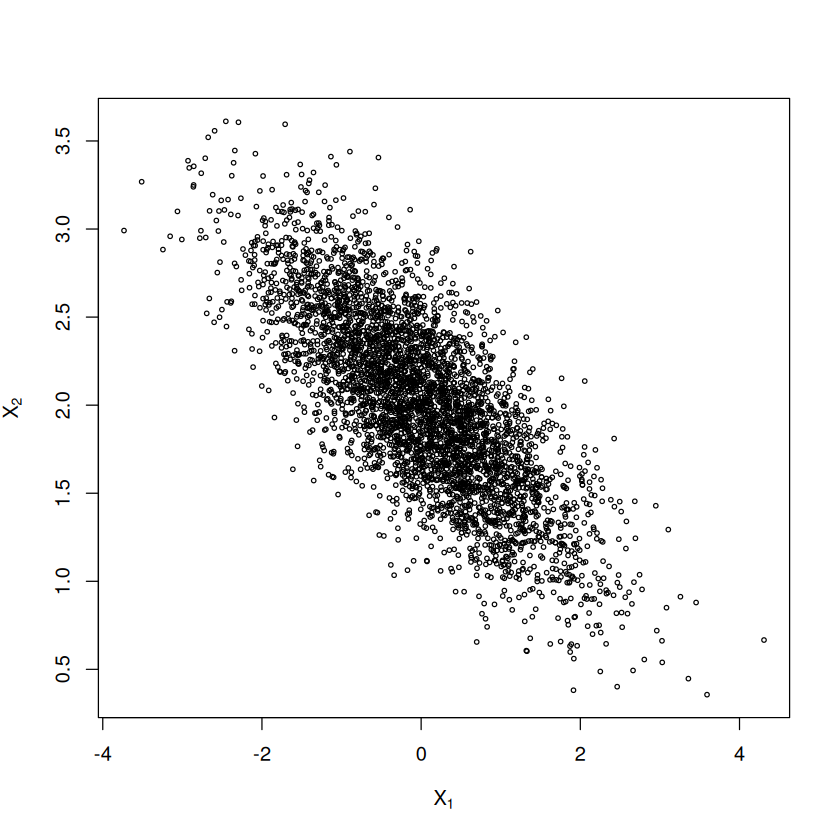

In [4]:
plot(x,
    main = "", cex = .5, xlab = bquote(X[1]),
    ylab = bquote(X[2]), ylim = range(x[, 2])
)

Bài tập 11.9 & 11.10